# Getting Started

This Jupyter notebook is a short demonstration of Python for scientific data analysis.
It covers the following points:

* Plotting a sine wave
* Generating a column matrix of data
* Writing data to a text-file, and reading data from a text-file
* Waiting for a button-press to continue the program exectution
* Using a dictionary, which is similar to MATLAB structures
* Extracting data which fulfill a certain condition
* Calculating the best-fit-line to noisy data
* Formatting text-output
* Waiting for a keyboard-press
* Calculating confidence intervals for line-fits
* Saving figures

author: Thomas Haslwanter
date:   Dec-2019

# Modules and Packages

In contrast to MATLAB, you explicitly have to load the modules that you need.
And don't worry here about not knowing the right modules: *numpy*, *scipy*, and
*matplotlib.pyplot* are almost everything you will need most of the time, and you
will quickly get used to those.

In [32]:
import numpy as np                  # for working with vectors and matrices
import matplotlib.pyplot as plt     # for plotting

# Sine Wave

In [33]:
# Note: single comment lines are indicated by "#".

# Get Manica Data from ods File
t = np.arange(0,20,0.1)
x = np.sin(t)

# The basic numerical functions, as well as everything with vector ans matrices 
# is in the package "numpy".

# Next, save the data in a text-file, in column form.
out_file = 'test.txt'
np.savetxt(out_file, np.column_stack([t,x]) )

# For displaying formatted text, the "format-strings" introduced in Python 3.5
# are definitely the most elegant way: they allow to use known variables directly
# in the "print"-statement
print(f'Data have been saved to {out_file}.')

Data have been saved to test.txt.


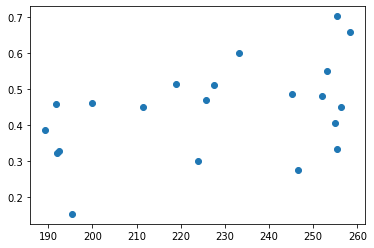

In [34]:
# Read the data into a different variable
inData = np.genfromtxt("./Data/manica/VB_WF-PMD.csv", delimiter=",")
x2 = inData[:,0] # Note that Python starts at "0"!
t2 = inData[:,1]

# Note: Python used (...) for function arguments, and [...] for indexing.

# Plot the data
plt.scatter(x2, t2)


# Noisy Data and Linefits

Fit the following function: $y = k*x + d$

   ## Fitting a line to the data

In [35]:
# Determine the best-fit line
# To do so, you have to generate a so-called Design Matrix, with "time" in the first
# column, and a column of "1" in the second column:
x_mat = np.column_stack( [x2, np.ones(len(x2))])

# A numerical detail: For the least-squares solution to a linear matrix equation,
# the optional parameter "rcond" determines how  small singular values
# of the matrix are handled.
slope, intercept = np.linalg.lstsq(x_mat, t2, rcond=None)[0]

Fit line: intercept = {intercept:5.3f}, and slope = {slope:5.3f}


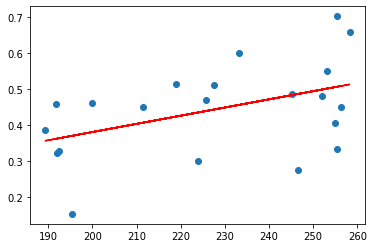

In [36]:
# Show and plot the fit, and save it to a PNG-file with a medium resolution.
# The "modern" way of Python-formatting is used
plt.scatter(x2, t2)
plt.plot(x2, intercept + slope*x2, 'r')
plt.savefig('linefit.png', dpi=200)
print(r'Fit line: intercept = {intercept:5.3f}, and slope = {slope:5.3f}')

# Pandas

In [37]:
# If you want to know confidence intervals, best switch to *pandas*
# Pandas is mainly used for statistics and worksheet-like data
import pandas as pd

# The calculation of OLS has been moved to *statsmodels* now
import statsmodels.formula.api as smf

# Note that this is an advanced topic, and requires new data structures
# such ad "DataFrames" and "ordinary-least-squares" or "ols-models".
my_dict = {'x':t_high, 'y':x_high}
df = pd.DataFrame(my_dict)
model = smf.ols('y~x', df).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.904   
Dependent Variable: y                AIC:                493.5581
Date:               2022-01-22 01:11 BIC:                498.5354
No. Observations:   89               Log-Likelihood:     -244.78 
Df Model:           1                F-statistic:        830.7   
Df Residuals:       87               Prob (F-statistic): 2.78e-46
R-squared:          0.905            Scale:              14.666  
-----------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept     102.4983   0.9592 106.8600 0.0000 100.5918 104.4048
x               0.4554   0.0158  28.8213 0.0000   0.4240   0.4868
-----------------------------------------------------------------
Omnibus:              0.913        Durbin-Watson:           2.338
Prob(Omnibus):        0.633

# More Python Info on the Web

In [38]:
# [http://scipy-lectures.github.com/](http://scipy-lectures.github.com/) Python Scientifc Lecture Notes. **If you read nothing else, read this!**

# [https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) Start here if you have lots of Matlab experience.

# [https://docs.python.org/3.7/tutorial/](https://docs.python.org/3.6/tutorial/) The Python tutorial. The original introduction.

# [http://jrjohansson.github.com/](http://jrjohansson.github.com/) Lectures on scienti